## IMPORTS

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, ttest_rel
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## DATA

In [2]:
data = yf.download("AAPL", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,70.570000,75.360001,69.430000,74.702499,74.127892,341397200
2020-03-03,75.917503,76.000000,71.449997,72.330002,71.773636,319475600
2020-03-04,74.110001,75.849998,73.282501,75.684998,75.102829,219178400
2020-03-05,73.879997,74.887497,72.852501,73.230003,72.666725,187572800
2020-03-06,70.500000,72.705002,70.307503,72.257500,71.701706,226176800
2020-03-09,65.937500,69.522499,65.750000,66.542503,66.030655,286744800
2020-03-10,69.285004,71.610001,67.342499,71.334999,70.786301,285290000
2020-03-11,69.347504,70.305000,67.964996,68.857498,68.327858,255598800
2020-03-12,63.985001,67.500000,62.000000,62.057499,61.580158,418474000


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-22,128.009995,129.720001,125.599998,126.000000,126.000000,103916400
2021-02-23,123.760002,126.709999,118.389999,125.860001,125.860001,158273000
2021-02-24,124.940002,125.559998,122.230003,125.349998,125.349998,111039900
2021-02-25,124.680000,126.459999,120.540001,120.989998,120.989998,148199500
2021-02-26,122.589996,124.849998,121.199997,121.260002,121.260002,164320000


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,103.714871,105.188705,102.146942,103.719183,103.366111,1.513452e+08
std,24.102897,24.139187,23.671353,23.881603,23.996590,6.872757e+07
min,57.020000,57.125000,53.152500,56.092499,55.661041,4.669130e+07
25%,80.000000,80.860001,79.216248,80.135002,79.733864,1.029256e+08
50%,112.889999,115.000000,110.297501,112.727501,112.365448,1.353724e+08
75%,122.599998,124.858749,120.720001,122.830002,122.646732,1.809260e+08
max,143.600006,145.089996,141.369995,143.160004,142.946396,4.184740e+08


### Date of minimum closing stock

In [7]:
data[data["Adj Close"] == data["Adj Close"].min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-23,57.02,57.125,53.1525,56.092499,55.661041,336752800


### Date of maximum closing stock

In [8]:
data[data["Adj Close"] == data["Adj Close"].max()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-26,143.600006,144.300003,141.369995,143.160004,142.946396,98390600


In [9]:
#shape of dataframe
data.shape

(251, 6)

Text(0.5, 1.0, 'Apple Stock Price')

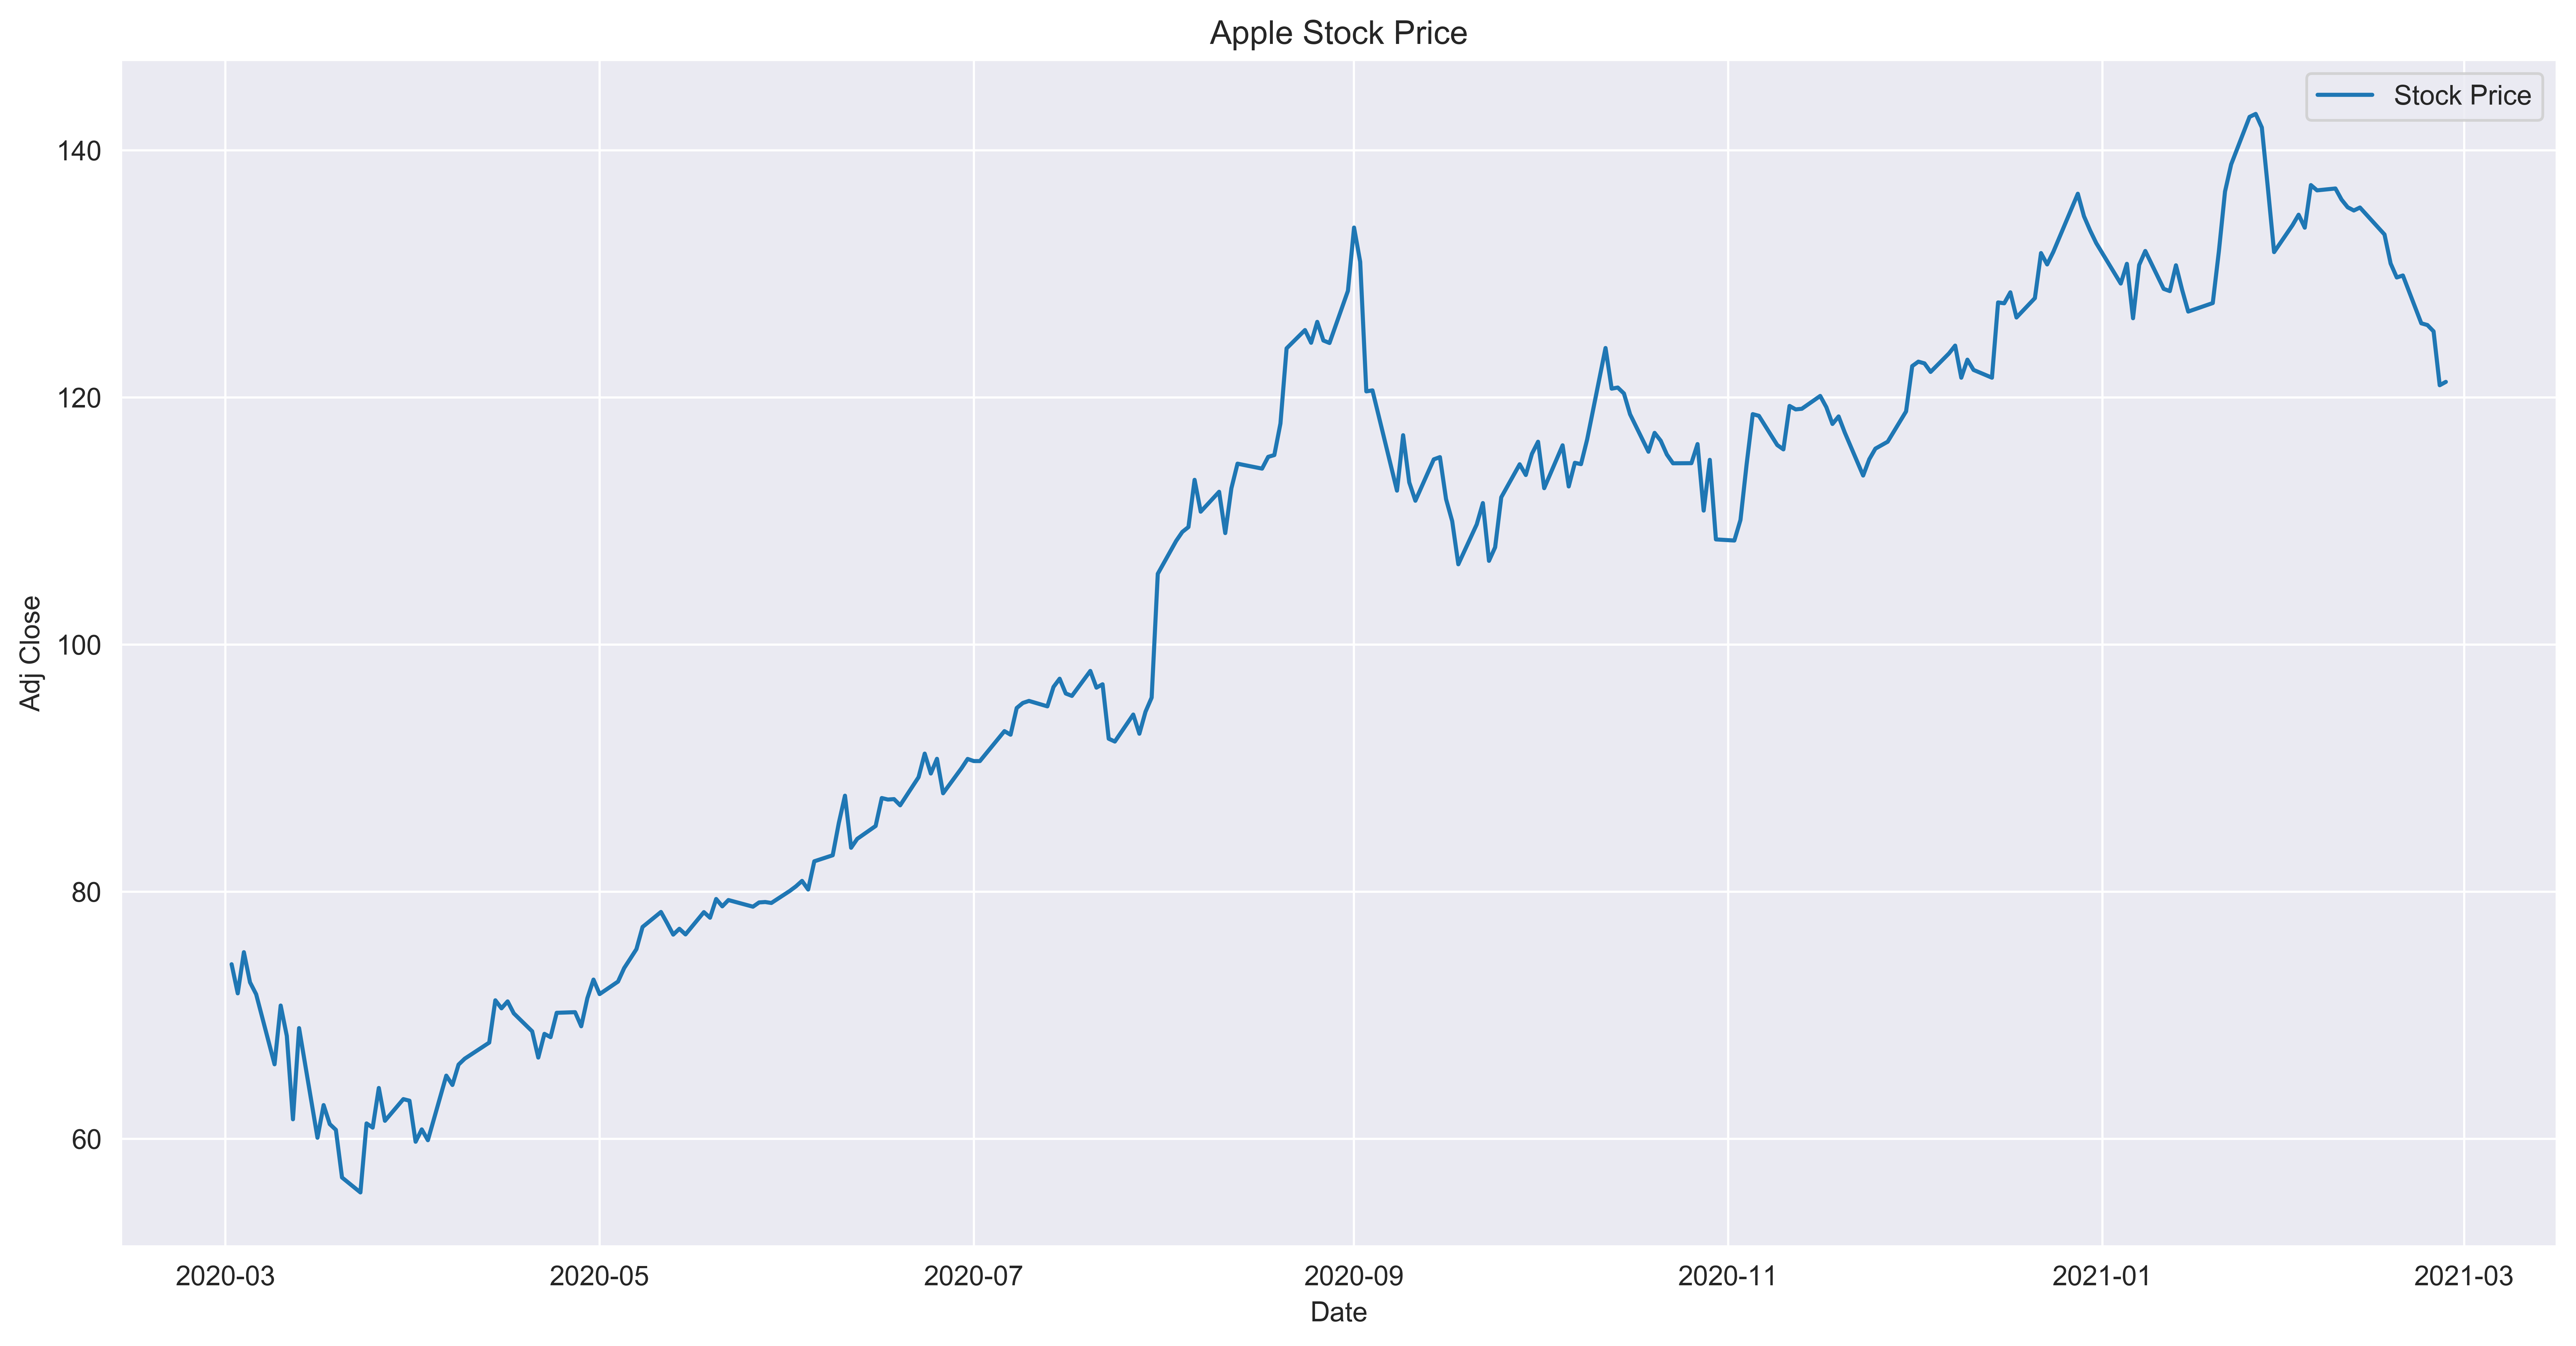

In [10]:
plt.figure(figsize=[16, 8], facecolor="w", dpi=550)
sns.set_style(style="darkgrid")
sns.lineplot(data.index, data["Adj Close"])
#sns.lineplot(data.index, data["Adj Close"].rolling(window=20).mean())
plt.legend(["Stock Price","Moving Average"])
plt.title("Apple Stock Price")

Text(0.5, 1.0, 'Apple Stock Price with monthly moving average')

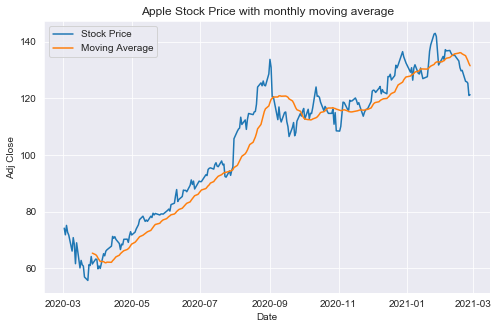

In [11]:
plt.figure(figsize=[8, 5], facecolor="w")
sns.set_style(style="darkgrid")
sns.lineplot(data.index, data["Adj Close"])
sns.lineplot(data.index, data["Adj Close"].rolling(window=20).mean())
plt.legend(["Stock Price","Moving Average"])
plt.title("Apple Stock Price with monthly moving average")

In [12]:
TRADING_DAYS = 252
returns = (data['Adj Close'] - data['Adj Close'].shift(1))/data['Adj Close'].shift(1)
returns

Date
2020-03-02         NaN
2020-03-03   -0.031759
2020-03-04    0.046385
2020-03-05   -0.032437
2020-03-06   -0.013280
                ...   
2021-02-22   -0.029799
2021-02-23   -0.001111
2021-02-24   -0.004052
2021-02-25   -0.034783
2021-02-26    0.002232
Name: Adj Close, Length: 251, dtype: float64

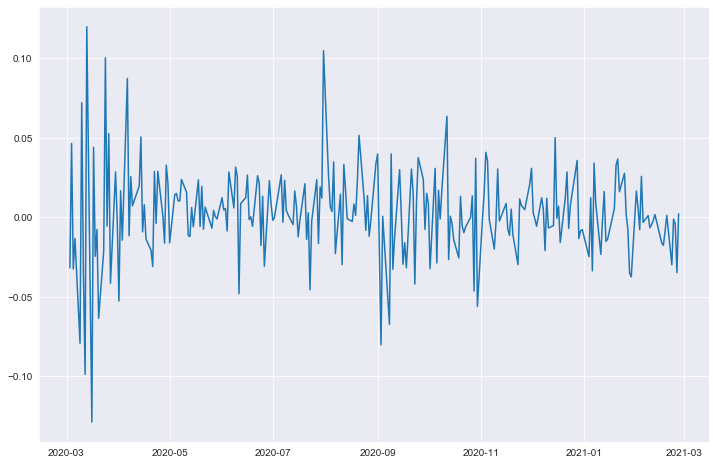

In [13]:
plt.figure(figsize=(12,8))
plt.plot(returns)

#### The returns of stock price follows a normal distribution

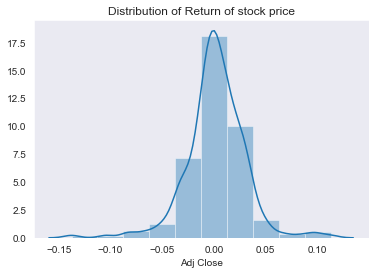

In [14]:
plt.title("Distribution of Return of stock price")
plt.grid()
sns.distplot(data['Adj Close'].pct_change().apply(lambda x: np.log(x+1)), bins=10,)

## Annualized volatility

In [15]:
### annualized volatility for 12 Months

returns.fillna(0, inplace=True)
volatility = returns.std() * np.sqrt(252)
round(volatility, 4)

0.4559

In [16]:
### annualized volatility for the first six Months

first_six_vol = round(data['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252), 4)
first_six_vol

0.5258

In [17]:
### annualized volatility for the last 6 Months

last_six_vol = round(data['Adj Close'][125:].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252), 4)
last_six_vol

0.3779

# PRICING MODELS

### Scholes-Merton Model

In [18]:
class CallPutValue():
    
    def __init__(self, S, E, t, r, vol):
        
        self.S = S   # S = underlying price
        self.E = E   # E = Strike price
        self.t = t   # t = time to expiry
        self.r = r   # r = effective rate
        self.vol = vol  #vol =  volatility
        self.d1 = (np.log(self.S/self.E) + (self.r + .5 * self.vol ** 2) * self.t) / (self.vol * np.sqrt(self.t))
        self.d2 = (np.log(self.S/self.E) + (self.r - .5 * self.vol ** 2) * self.t) / (self.vol * np.sqrt(self.t))
    
    def BSM_put(self):
        return np.exp(-self.r*self.t)*(1 - norm.cdf(self.d2))
    
    def Delta(self):
        return np.round(-(np.exp(-self.r*self.t)* norm.pdf(self.d2))/(self.vol*self.S*np.sqrt(self.t)), 4)
        
    def Gamma(self):
        gamma = (np.exp(-self.r*self.t)*self.d1*norm.pdf(self.d2))/((self.vol**2) *(self.S**2)*(np.sqrt(self.t)))
        return np.round(gamma, 4)
    
    def Vega(self):
        vega = (np.exp(-self.r*self.t)*norm.pdf(self.d2))*(self.d1/self.vol)
        return np.round(vega, 4)
    
    def speed(self):
        rt = np.exp(-self.r*self.t)*norm.pdf(self.d2)/((self.vol**2) * (self.S**3)*np.sqrt(self.t))
        rp = -2*self.d1 + ((1 - self.d1*self.d2)/(self.vol*np.sqrt(self.t)))
        speed = rt * rp
        return speed
        
    def Theta(self):        
        lf = self.r*np.exp(-self.r*self.t)*(1 - norm.cdf(self.d2))
        rf = np.exp(-self.r*self.t)*norm.pdf(self.d2)*((self.d1/(2*self.t))-((self.r)/(self.vol*np.sqrt(self.t))))
        theta = lf - rf
        return np.round(theta, 4)
    
    def Rho(self):
        one = -self.t*np.exp(-self.r*self.t)*(1 - norm.cdf(self.d2))
        two = (np.sqrt(self.t)/self.vol)*np.exp(-self.r*self.t)*norm.pdf(self.d2)
        return np.round(one-two, 4)

## Binomial N-step Tree Model

In [19]:
#### Binary Option
def Binomial_tree(S0, E, T, r, vol, N, option='bin', payoff='put'):
    
    dT = float(T) / N                             # Delta t , N is the number of steps
    u = np.exp(vol * np.sqrt(dT))                 # up multiplying factor
    d = 1.0 / u                                   # down multiplying factor 


    S = np.zeros((N+1, N+1))
    S[0, 0] = S0                             
    z = 1
    for t in range(1, N + 1):
        for i in range(z):
            S[i, t] = S[i, t-1] * u
            S[i+1, t] = S[i, t-1] * d
        z+= 1    
    a = np.exp(r * dT)    # risk free compound return
    p = (a - d)/(u - d)      #a is risk neutral up probability
    q = 1.0 - p              # risk neutral down probability
    
###########################################################
    S_T = S[:,-1]
    V = np.zeros((N + 1, N + 1))

    if payoff == "put":
        V[:,-1] = np.heaviside(E - S_T, 0.0)   

    if option == "bin":
        for j in range(N-1, -1, -1):
            for i in range(j+1):
                V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
        #print(V)
        return round(V[0,0], 4)

## Monte-Carlo Simulation

In [20]:
def mcs_simulation_put(p, S0, E, T, r, vol, seed=True):
   ##############  p is the number of iterations  ##################
    M = int(T*360)
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0
    if seed:
        np.random.seed(1234)
        rn = np.random.standard_normal(S.shape)
    else: 
         rn = np.random.standard_normal(S.shape)
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * rn[t])
        
    S = np.transpose(S)
    put = np.mean(np.heaviside(E - S[:,-1],0))

    return round(put, 4)



# Implementation of Model

- data for pricing, to evaluate models

In [21]:
#126th trading day stock price
stock_price = data['Adj Close'][126]

strike_price = 110
risk_free_rate = .04
time_to_expiry = 90.0
sigma = first_six_vol

### Black Scholes Model

In [22]:
bsm = CallPutValue(S=stock_price, E=strike_price, vol=sigma, r=risk_free_rate, t=(time_to_expiry/365))
option_value = bsm.BSM_put()
option_value

0.34902783869287457

#### Gamma

In [23]:
bsm.Gamma()

0.0001

In [24]:
SP = np.linspace(70,150,11)
Gamma = np.zeros((len(SP), 1))
for i in range(len(SP)):
    Gamma[i] = CallPutValue(S=SP[i], E=100, vol=0.25, r=0.05, t=1).Gamma()

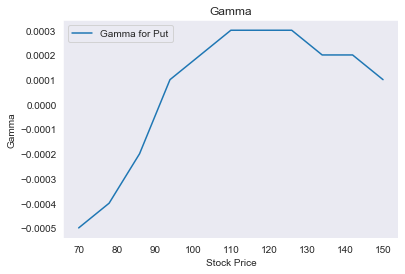

In [25]:
fig = plt.figure()
plt.plot(SP, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

#### Delta

In [26]:
bsm.Delta()

-0.0113

In [27]:
SD = np.linspace(50,150,11)
Delta_Put = np.zeros((len(SD),1))
for i in range(len(SD)):
    Delta_Put [i] =  CallPutValue(S=SD[i], E=100, vol=0.25, r=0.05, t=1).Delta()

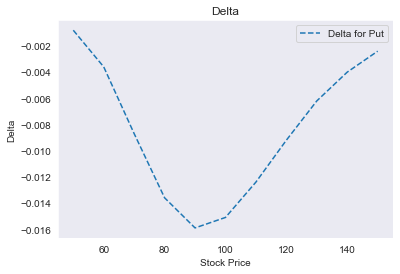

In [28]:
fig = plt.figure()
plt.plot(SD, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

#### Vega

In [29]:
bsm.Vega()

0.4474

In [30]:
vo = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vo),1))
for i in range(len(vo)):
    Vega [i] = CallPutValue(S=100, E=100, vol=vo[i], r=0.05, t=1).Vega()
    

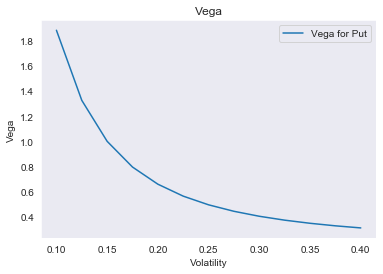

In [31]:
fig = plt.figure()
plt.plot(vo, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

#### Theta

In [32]:
bsm.Theta()

-0.4067

In [33]:
Th = np.linspace(0.25,3,12)
Theta_Put = np.zeros((len(Th),1))
for i in range(len(Th)):
    Theta_Put [i] = CallPutValue(S=100, E=100, vol=.25, r=0.05, t=Th[i]).Theta()

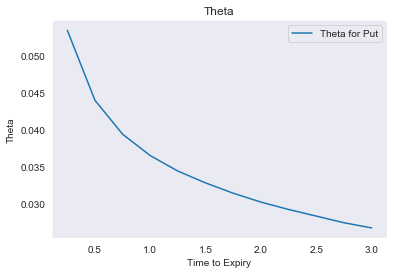

In [34]:
fig = plt.figure()
plt.plot(Th, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

#### Rho

In [35]:
bsm.Rho()

-0.4333

In [36]:
r = np.linspace(0,0.1,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = CallPutValue(S=100, E=100, vol=0.25, r=r[i], t=1).Rho()

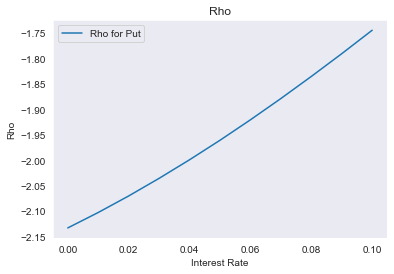

In [37]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

In [38]:
greeks = pd.DataFrame(np.column_stack((bsm.Gamma(),bsm.Delta(),bsm.Vega(), bsm.Theta(), bsm.Rho())), columns=("Gamma", "Delta", "Vega", "Theta", "Rho")).T
greeks.rename(columns={0:"Value"}, inplace=True)
greeks

,Value
Gamma,0.0001
Delta,-0.0113
Vega,0.4474
Theta,-0.4067
Rho,-0.4333


### The effect of volatilty and time on option price (Using BSM model)

In [39]:
## First six month volatility and 90 days time of expiry
fir_bsm90 = CallPutValue(S=stock_price, E=strike_price, vol=sigma, r=risk_free_rate, t=(time_to_expiry/365))
F90 = fir_bsm90.BSM_put()

## First six month volatility and 150 days time of expiry
fir_bsm150 = CallPutValue(S=stock_price, E=strike_price, vol=sigma, r=risk_free_rate, t=(150/365))
F150 = fir_bsm150.BSM_put()

## second six months volatility and 90 days time of expiry 

sec_bsm90 = CallPutValue(S=stock_price, E=strike_price, vol=last_six_vol, r=risk_free_rate, t=(time_to_expiry/365))
S90 = sec_bsm90.BSM_put()

## second six months volatility and 150 days time of expiry
sec_bsm150 = CallPutValue(S=stock_price, E=strike_price, vol=last_six_vol, r=risk_free_rate, t=(150/365))
S150 = sec_bsm150.BSM_put()

Volatility = ['1st 6Month', '1st 6Month', '2nd 6Month', '2nd 6Month']
Time_expiry = ['90 days', '150 days', '90 days', '150 days']
Option = [F90,F150, S90, S150]




In [40]:
diff_option = pd.DataFrame({"First 6Month Volatility": [F90,F150], "Second 6Month Volatility": [S90,S150]}, index=['90 Days Expiry', '150 Days Expiry'])


In [41]:
diff_option

,First 6Month Volatility,Second 6Month Volatility
90 Days Expiry,0.349028,0.266763
150 Days Expiry,0.396514,0.319347


### Binomial Tree

In [42]:
bt = Binomial_tree(S0=stock_price, E=strike_price, r=risk_free_rate, T=(time_to_expiry/365), vol=sigma, N=3)
bt

0.5348

### Monte Carlo Simulation

In [43]:
mc =  mcs_simulation_put(p=5000, S0=stock_price, E=strike_price, T=(time_to_expiry/360), r=risk_free_rate, vol=sigma)
mc

0.3556

## Comparing Models

- consider a range of spot prices from 55 to 150

In [101]:
#number of spot prices
n = 200

Stock_prices = np.linspace(55,150, n)
strike_price = 100
time_to_expiry = 90.0/365
volatility = 0.25
rate = 0.05

Put_BS = np.zeros((n,))
Put_BT = np.zeros((n,))
Put_MC = np.zeros((n,))

for i, S in enumerate(Stock_prices):
    Put_BS[i] = CallPutValue(S=S, E=strike_price, vol=volatility, r=rate, t=time_to_expiry).BSM_put()
    Put_BT[i] = Binomial_tree(S0=S, E=strike_price, r=rate, T=time_to_expiry, vol=volatility, N=100)
    Put_MC[i] = mcs_simulation_put(p=1000, S0=S, E=strike_price, T=time_to_expiry, r=rate, vol=volatility)


In [102]:
Put_BS[:5]

array([0.98774605, 0.98774569, 0.9877452 , 0.98774453, 0.98774362])

In [103]:
Put_BT[:5]

array([0.9877, 0.9877, 0.9877, 0.9877, 0.9877])

In [104]:
Put_MC[:5]

array([1., 1., 1., 1., 1.])

In [105]:
output = pd.DataFrame(np.column_stack((Stock_prices, Put_BS, Put_BT, Put_MC)), columns=['Stock Price','Black Scholes', 'Binomial Tree', 'Monte-Carlo Simulation'])
output.head(10)

,Stock Price,Black Scholes,Binomial Tree,Monte-Carlo Simulation
0,55.000000,0.987746,0.9877,1.0
1,55.477387,0.987746,0.9877,1.0
2,55.954774,0.987745,0.9877,1.0
3,56.432161,0.987745,0.9877,1.0
4,56.909548,0.987744,0.9877,1.0
5,57.386935,0.987742,0.9877,1.0
6,57.864322,0.987741,0.9877,1.0
7,58.341709,0.987739,0.9877,1.0
8,58.819095,0.987736,0.9877,1.0
9,59.296482,0.987732,0.9877,1.0


### Average Variation between the result of each model

In [106]:
round(output[["Black Scholes","Binomial Tree","Monte-Carlo Simulation"]].std(axis=1).mean(), 4)

0.0076

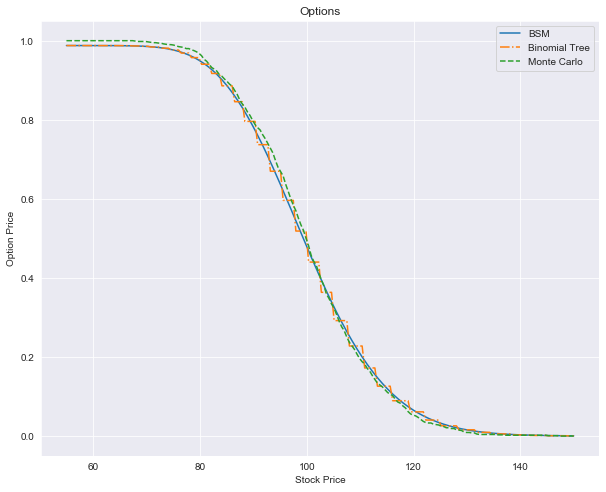

In [107]:
fig = plt.figure(figsize=[10, 8])

#plot the option prices from each model against stock prices
plt.grid(b=True)
plt.plot(Stock_prices, Put_BS, '-')
plt.plot(Stock_prices, Put_BT, '-.')
plt.plot(Stock_prices, Put_MC, '--')


plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('Options')
plt.legend(['BSM', "Binomial Tree", "Monte Carlo"])

In [108]:
corr_df = output.drop(['Stock Price'], axis =1)
corr_df.corr()

,Black Scholes,Binomial Tree,Monte-Carlo Simulation
Black Scholes,1.000000,0.999654,0.999810
Binomial Tree,0.999654,1.000000,0.999507
Monte-Carlo Simulation,0.999810,0.999507,1.000000
